# Day 03 In-Class Assignment: Plotting with Matplotlib
### <p style="text-align: right;"> &#9989; Cesarine Graham</p>

#### <p style="text-align: right;"> &#9989; Dhiti, Sophie, Kinza.</p>

## Goals of this assignment

The primary goal of this assignment is to revisit basic Python plotting functionality and apply it to physics problems.

* Revisit Matlibplot in Python in polar coordinates
* Make a plot showing wave propagation and interference
* The Mandelbrot set

## Assignment instructions

Work with your group to complete this assignment. Upload the assignment to Gradescope at the end of class.
**Make sure everyone's name is listed in everyone's notebook before moving on**

---
## Part 1: Revisit the pre-class assignment: Deltoid curve

*In case you did not have time to finish this assignment, discuss with your groupmates how to proceed and compare the code and results to make sure everyone in the group reached the same results.*

Although the `plot` function is designed primarily for plotting functions on the vertical axis sampled along the horizontal axis, it can be adapted for other kinds of plotting as well.

Make a plot of the so-called _deltoid_ curve, which is defined parametrically by the equations

$x = 2 \cos \theta + \cos 2\theta $

$y = 2 \sin \theta - \sin 2\theta $

where $0\le\theta<2\pi$.  

### 1.1 Parametric plot
Sample $\theta$ between zero and $2\pi$ and calculate $x$ and $y$ for each sample using the equations above.
Then, plot $y$ as a function of $x$.

Set the ranges of the $x$ and $y$ axes to be the same for everyone in the group. Compare the results.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

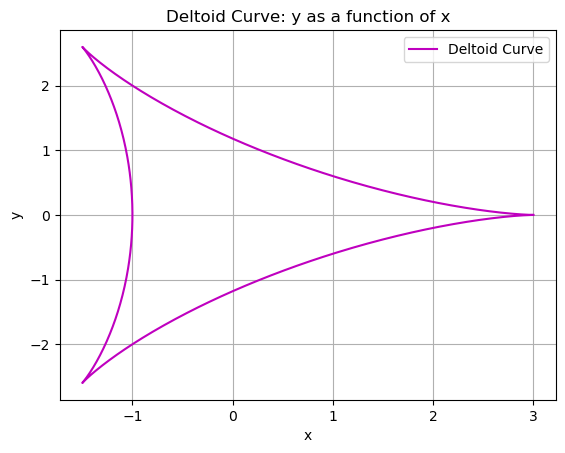

In [5]:
#Theta between 0 and 2*pi
theta_values = np.linspace(0, 2 * np.pi, 1000)

#Parametric equations for the deltoid curve
x_values = 2 * np.cos(theta_values) + np.cos(2 * theta_values)
y_values = 2 * np.sin(theta_values) - np.sin(2 * theta_values)

#Plotting y as a function of x
plt.plot(x_values, y_values, label='Deltoid Curve', color='m')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Deltoid Curve: y as a function of x')
plt.legend()
plt.grid(True)
plt.show()

### 1.2 Polar plot
Taking this approach a step further, one can make a polar plot $r=f(\theta)$ for some function $f$ by calculating $r$ for a range of values of $\theta$
and then converting $r$ and $\theta$ to Cartesian coordinates using the standard equations

$x = r\cos\theta$,

$y = r\sin\theta$.  

Use this method to make a plot of the Galilean spiral $r = \theta^2$ for $0\le\theta\le 10\pi$.

Set the ranges of the $x$ and $y$ axes to be the same for everyone in the group. Compare the results.

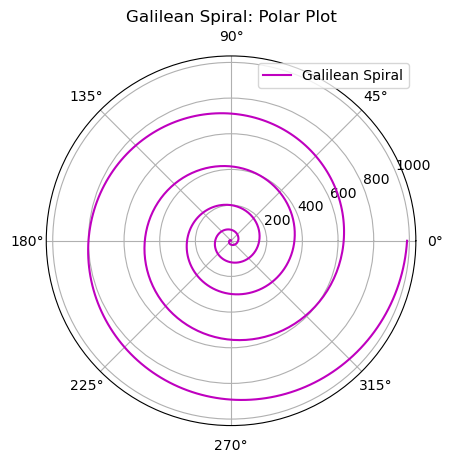

In [8]:
# Theta between 0 and 10*pi
theta_values = np.linspace(0, 10 * np.pi, 1000)

# Polar equation for the Galilean spiral
r_values = theta_values**2

# Plotting the Galilean spiral in polar coordinates
plt.polar(theta_values, r_values, label='Galilean Spiral', color='m')
plt.title('Galilean Spiral: Polar Plot')
plt.legend()
plt.show()

### 1.3  Fey's function
Using the same method, make a polar plot of Fey's function:

$r = e^{\cos\theta} - 2 \cos 4\theta + \sin^5 \frac{\theta}{12}$

over the range $0\le\theta\le 24\pi$.

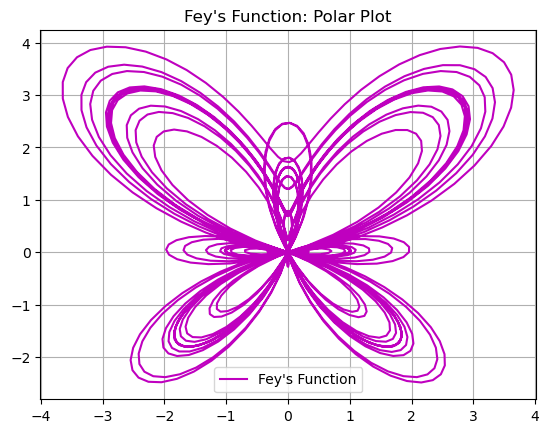

In [9]:
# Theta between 0 and 24*pi
theta_values = np.linspace(0, 24 * np.pi, 1500)

# Fey's function in polar coordinates
r_values = np.exp(np.cos(theta_values)) - 2 * np.cos(4 * theta_values) + np.sin(theta_values/12)**5

# Convert polar coordinates to Cartesian coordinates
x_values = r_values * np.cos(theta_values)
y_values = r_values * np.sin(theta_values)

# Plotting Fey's function in polar coordinates
plt.plot(y_values, x_values, label="Fey's Function", color='m')
plt.title("Fey's Function: Polar Plot")
plt.grid()
plt.legend()
plt.show()

## STOP
Take a moment to compare results. If there is any disagreement or anyone in your group who needs help with the problems, please attempt to work things out.
Only move on to the next part when everyone in your group in done with Part 1.

---
## Part 2: Wave Propagation and Interference

Suppose we drop a pebble in a pond and waves radiate out from the spot where it fell.
We could create a simple representation of the physics with a sine wave, spreading out in a uniform circle, to represent the height of the waves at some later time.
(Assume lack of diminished amplitude with increasing distance from the origin is the spherical cow of this exercise.)
If the center of the circle is at $x_1$, $y_1$ then the distance $r_1$ to the center from a point $x$, $y$ is

$$r_1= \sqrt{(x-x_1)^2+(y-y_1)^2}$$

and the sine wave for the height is

$$\xi_1(x,y)=\xi_0 \sin(k r_1)$$

where $\xi_0$ is the amplitude of the waves
and $k$ is the wavevector, related to the
wavelength $\lambda$ by $k = 2\pi/\lambda$.

The wavelength of the waves is $\lambda = 5$&nbsp;cm, the amplitude is 1 &nbsp;m, and the centers of the circles are 20&nbsp;cm apart.


### 2.1 Single-Wave Propagation

Write a program to make an image of the height for a 1-m square region of the pond, using a grid of $500 \times 500$ points.
To make the image, we create an array of values representing the height $\xi_1$ at the grid of points and then use
that array to make a density plot.
Set the center of the wave to be in the center of the square.


Text(0, 0.5, 'y')

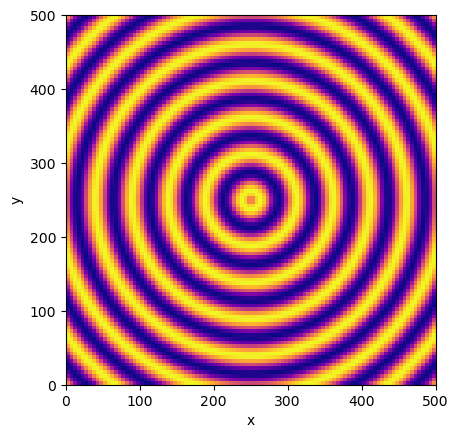

In [39]:
# your function here

x= np.linspace(0,500,100) #1 meter box from 0 to 500
y= np.linspace(0,500,100) #1 meter box from 0 to 500

x,y = np.meshgrid(x,y)

x_center = 250 #halfway point horizontally
y_center = 250 #halfway point vertically

lamb = 50 #scaled lambda
amp = 1 
k = (2*np.pi) / lamb
r = np.sqrt((x-x_center)**2 + (y-y_center)**2)
height = amp * np.sin(k*r)

plt.imshow(height, extent=[0, 500, 0, 500], cmap= 'plasma')
plt.xlabel('x [m]')
plt.ylabel('y [m]')


### 2.2  Wave Interference
Now, suppose we drop another pebble in the pond, creating another circular set of waves with the same wavelength and amplitude but centered on a different point $x_2$, $y_2$:

$$\xi_2(x,y)=\xi_0 \sin(k r_2)$$  with
$$r_2= \sqrt{(x-x_2)^2+(y-y_2)^2}$$

Then, assuming the waves add linearly (which is a reasonable assumption for water waves, provided they are not too big), the total height of the surface at a point $x$, $y$ is
$\xi(x, y) = \xi_0 \sin (k r_1) + \xi_0 \sin (k r_2) $

Write a program to make an image of the height for 1-m square region of the pond, using  a grid of $500 \times 500$ points.
To make the image we create  an array of values representing the height $\xi$ at the grid of points and then use
that array to make a density plot.
Set center of the square to be the midpoint between the two wave centers.

Text(0, 0.5, 'y [m]')

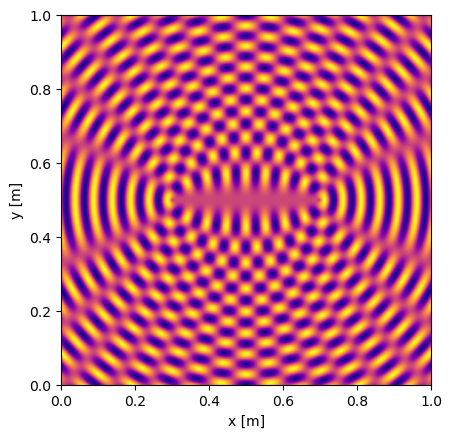

In [48]:
# your function here

x= np.linspace(0,1,500) #1 meter box from 0 to 500
y= np.linspace(0,1,500) #1 meter box from 0 to 500

x,y = np.meshgrid(x,y)

x1_center = 0.3 #halfway point horizontally
y1_center = 0.5 #halfway point vertically

x2_center = 0.7 #halfway point horizontally
y2_center = 0.5 #halfway point vertically

lamb = 0.05 #scaled lambda
amp = 1 
k = (2*np.pi) / lamb
r1 = np.sqrt((x-x1_center)**2 + (y-y1_center)**2)
r2 = np.sqrt((x-x2_center)**2 + (y-y2_center)**2)

height1 = amp * np.sin(k*r1)
height2 = amp * np.sin(k*r2)
height_tot = height1 + height2

plt.imshow(height_tot, extent=[0, 1, 0, 1], cmap= 'plasma')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

## STOP
Take a moment to compare results. If there is any disagreement or anyone in your group who needs help with the problems, please attempt to work things out.
Only move on to the next part when everyone in your group in done with Part 2.

### this is something that ive done in my own time last semester that i wanted to use as reference

C:\Users\cesay\AppData\Local\Temp\ipykernel_17656\4058669780.py:25: RuntimeWarning: overflow encountered in multiply
  z = z * z + c
C:\Users\cesay\AppData\Local\Temp\ipykernel_17656\4058669780.py:25: RuntimeWarning: invalid value encountered in multiply
  z = z * z + c
C:\Users\cesay\AppData\Local\Temp\ipykernel_17656\4058669780.py:26: RuntimeWarning: overflow encountered in absolute
  mask = np.abs(z) < 1000  # Escape radius


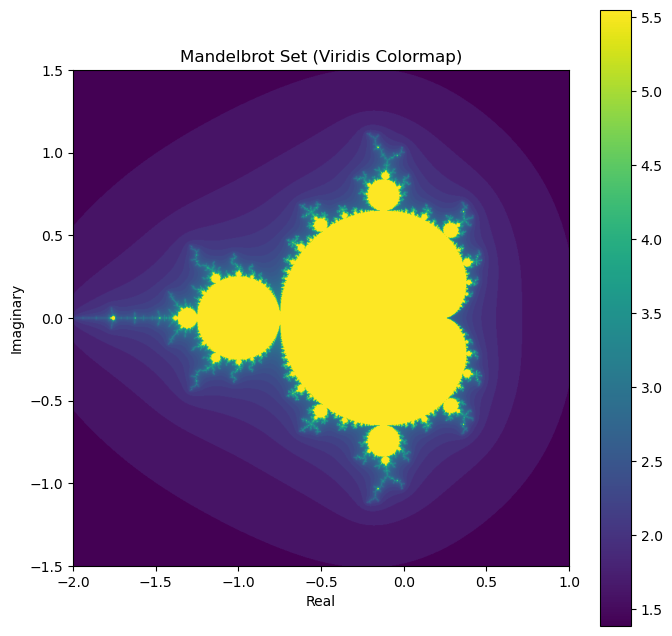

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Set the size of the image
width, height = 800, 800
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5

# Create a grid of complex numbers
x = np.linspace(x_min, x_max, width)
y = np.linspace(y_min, y_max, height)
X, Y = np.meshgrid(x, y)
c = X + 1j * Y

# Initialize arrays to store the Mandelbrot set
z = c.copy()
mandelbrot_set = np.zeros((width, height))

# Set the maximum number of iterations
max_iterations = 256

for i in range(max_iterations):
    z = z * z + c
    mask = np.abs(z) < 1000  # Escape radius
    mandelbrot_set += mask

# Apply the Viridis colormap
plt.figure(figsize=(8, 8))
plt.imshow(np.log(mandelbrot_set + 1), extent=(x_min, x_max, y_min, y_max), cmap='viridis')
plt.colorbar()
plt.title('Mandelbrot Set (Viridis Colormap)')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

--------
## Part 3: The Mandelbrot set:

The Mandelbrot set, named after its discoverer, the French mathematician Benoît Mandelbrot, is a _fractal_, an infinitely ramified mathematical object that contains structure within structure within structure, as deep as we care to look.
The definition of the Mandelbrot set is in terms of complex numbers as follows.
Consider the equation

$$M(z) = z^2 + c$$

where $z$ is a complex number and $c$ is a complex constant.

For any given value of $c$, this function turns an input number $z$ into an output number $z^\prime = M(z)$.

The definition of the Mandelbrot set involves the repeated iteration of this equation: we take an initial
starting value of $z$ and feed it into the equation to get $M(z)$, $M(M(z))$ and so forth.

The Mandelbrot set is the set of points in the complex plane that satisfy the following:

> For a given complex value of $c$, start with $z = 0$ and apply $M$ repeatedly.
  If the magnitude $|z|$ of the resulting value is ever greater than 2, then the point $c$ in the complex plane _not_ in the Mandelbrot set, otherwise it is in the set.

In order to use this definition one would, in principle, have to iterate infinitely many times to prove that a point is in the Mandelbrot set, since a point is in the set only if the iteration never passes $|z| = 2$ ever.
In practice, however, one usually just performs some large number of iterations, say 100, and if $|z|$ hasn’t exceeded 2 by that point then we call that good enough.

### 3.1 Mandelbrot iteration
Write a program perform the iteration for all values of $c = x + iy$ on an $N \times N$ grid spanning the region where $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$.


In [ ]:
# your code here



### 3.2 Mandelbrot plot
Make a density plot in which grid points inside the Mandelbrot set are colored black, and those outside are colored white.
The Mandelbrot set has a very distinctive shape that looks something like a beetle with a long snout &mdash; you'll know it when you see it.

*Hint: You will probably find it useful to start off with quite a coarse grid, i.e., with a small value of $N$ (perhaps $N = 20$) so that your program runs quickly while you are testing it.
Once you are sure it is working correctly, increase the value of $N$ to produce a final high-quality image of the shape of the set.*


In [ ]:
# your code here



### 3.3 Escape time
If you are feeling enthusiastic, here is another variant of the same exercise that can produce amazing pictures.
Instead of coloring points just black or white, color the points according to the number of iterations of the equation before $|z|$ becomes greater than 2 (or the maximum number of iterations if $|z|$ never becomes greater than 2).
If you use one of the more fanciful color schemes Python provides for density plots, such as the `hot` or `jet` schemes, you can make some spectacular images.

Another interesting variant is to color according to the logarithm of the number of iterations, which helps reveal some of the finer structure outside the set.
If you try this, you may wish to increase the maximum number of iterations.

To learn more about it, check out the Wikipedia article: https://en.wikipedia.org/wiki/Mandelbrot_set

In [ ]:
# your code here